In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
#Drop the columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
#check null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


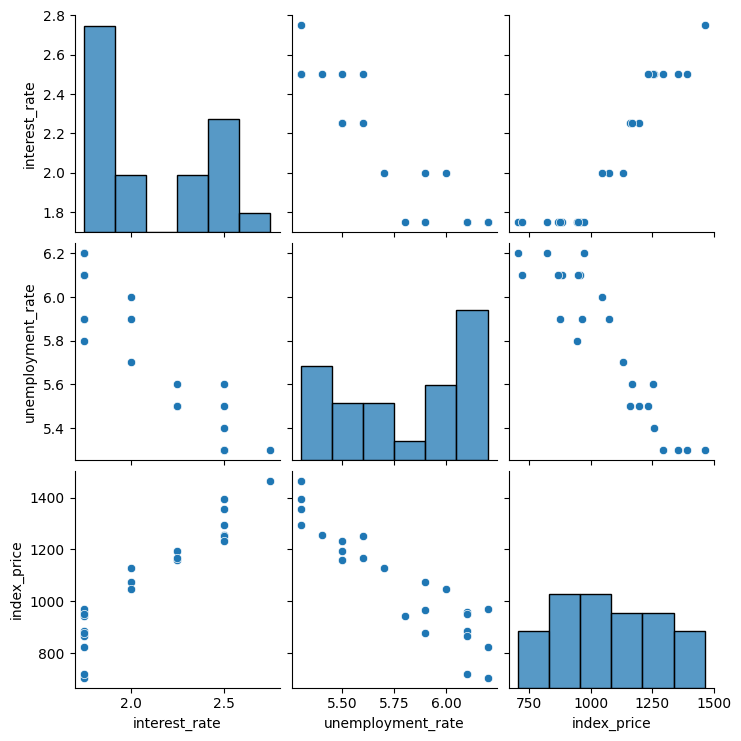

In [6]:
#Visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
#Correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

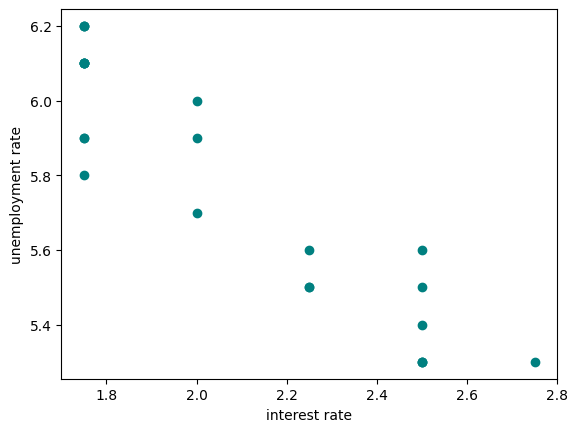

In [13]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='teal')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

#inverse relationship that we got here

In [14]:
#Seperate Independent and dependent feature
#X = df[['interest_rate','unemployment_rate']]
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [15]:
Y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [16]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [17]:
#Plot in seaborn - regplot
import seaborn as sns


In [25]:
#sns.regplot(df['index_price'],df['interest_rate'])
#sns.regplot(df['interest_rate'],df['index_price'])

In [26]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
X_train

array([[-0.72760688,  1.15311332],
       [-0.72760688,  0.20965697],
       [-0.72760688, -0.10482848],
       [ 1.45521375, -1.67725574],
       [-0.72760688,  1.15311332],
       [ 1.45521375, -1.04828484],
       [-0.72760688,  0.83862787],
       [ 0.        , -0.41931393],
       [-0.72760688,  0.20965697],
       [-0.72760688,  0.83862787],
       [ 0.72760688, -1.04828484],
       [-0.72760688,  0.83862787],
       [-0.72760688,  1.15311332],
       [-0.72760688,  0.83862787],
       [ 2.18282063, -1.67725574],
       [-0.72760688,  0.83862787],
       [ 1.45521375, -1.36277029],
       [ 0.72760688, -0.73379939]])

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [30]:
regression.fit(X_train,Y_train)

LinearRegression()

In [31]:
#Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,
                                   X_train,
                                   Y_train,
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [32]:
validation_score

array([ -9102.41736718,  -6617.04016286, -14585.43453287])

In [33]:
#average
np.mean(validation_score)

-10101.63068763764

In [35]:
#prediction
y_pred = regression.predict(X_test)
y_pred

array([1119.85575388, 1214.74596336, 1031.65891905, 1214.74596336,
        785.31173509,  753.68166527])

In [37]:
#performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

44499.69073410154
200.33333333333294
210.94949806553592


In [38]:
# Rsquare
from sklearn.metrics import r2_score

In [39]:
score = r2_score(Y_test,y_pred)
print(score)

-1.623304119414641


In [41]:
#Adjusted r squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

-3.372173532357735


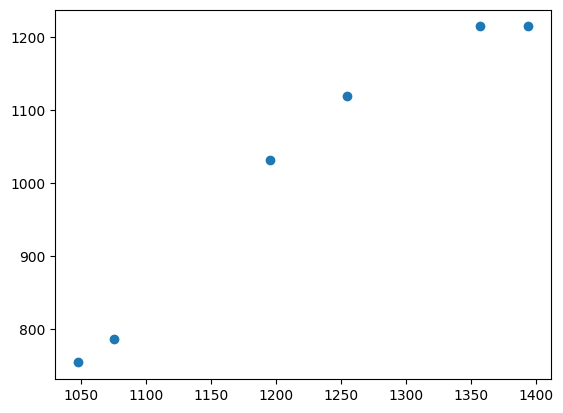

In [42]:
#Assumptions
plt.scatter(Y_test,y_pred)

In [43]:
residuals=Y_test-y_pred
print(residuals)

5     134.144246
1     179.254037
7     163.341081
2     142.254037
11    289.688265
12    293.318335
Name: index_price, dtype: float64


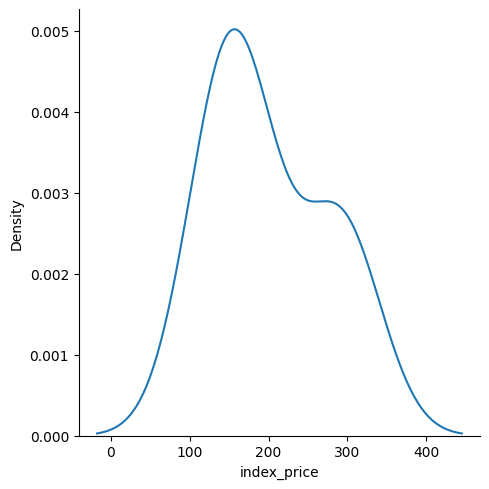

In [44]:
## Plot this residuals
sns.displot(residuals,kind='kde')

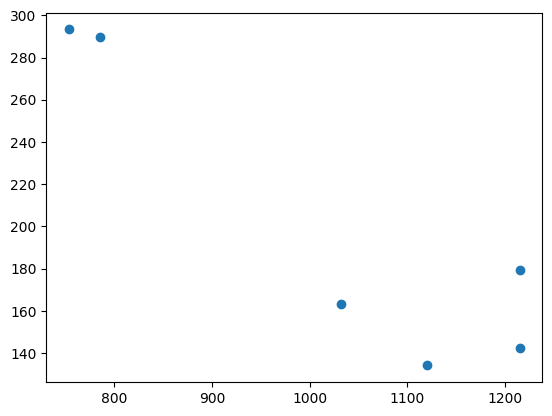

In [45]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)